# The Sparks Foundation

# GRIP(Graduate Rotational Internship Program) December 2022

## Name : PATEL DHVANIL VIKRAMKUMAR

## Domain :  Data Science & Business Analytics

### TASK-06 (Prediction Using Decision Tree Algorithm)

### Problem Statement : 

#### 1. Create The Decision Tree Classifier And Visualize It Graphically
#### 2. It Would Be Able To Predict The Right Class Accordingly.

In [67]:
# Importing all libraries required in this notebook
from pandas import *
from numpy import *

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import sklearn.metrics as sm
from sklearn import tree

import seaborn as sns
import matplotlib.pyplot as plt
import pydot
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

### Readng the Dataset

In [5]:
iris = read_csv("D:\Dhwanil\M.Sc\GRIP Intenship @ Sparks Foundation\Task 6\Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Exploring Data :

In [6]:
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [7]:
iris.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### How big is the dataset ?

In [9]:
iris.shape

(150, 6)

#### Conclusion :-
Here We have <b> 150 Rows / Records (Including Label)</b> and <b> 6 Columns / Attributes.

### Name of all column lable

In [11]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Now we check for Null value if it's present

In [12]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


#### Conclusion :
Thus, <b> There is no null value available in our Dataset

### Descriptive Statistics :

In [19]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Data Visualization

#### comparing various features

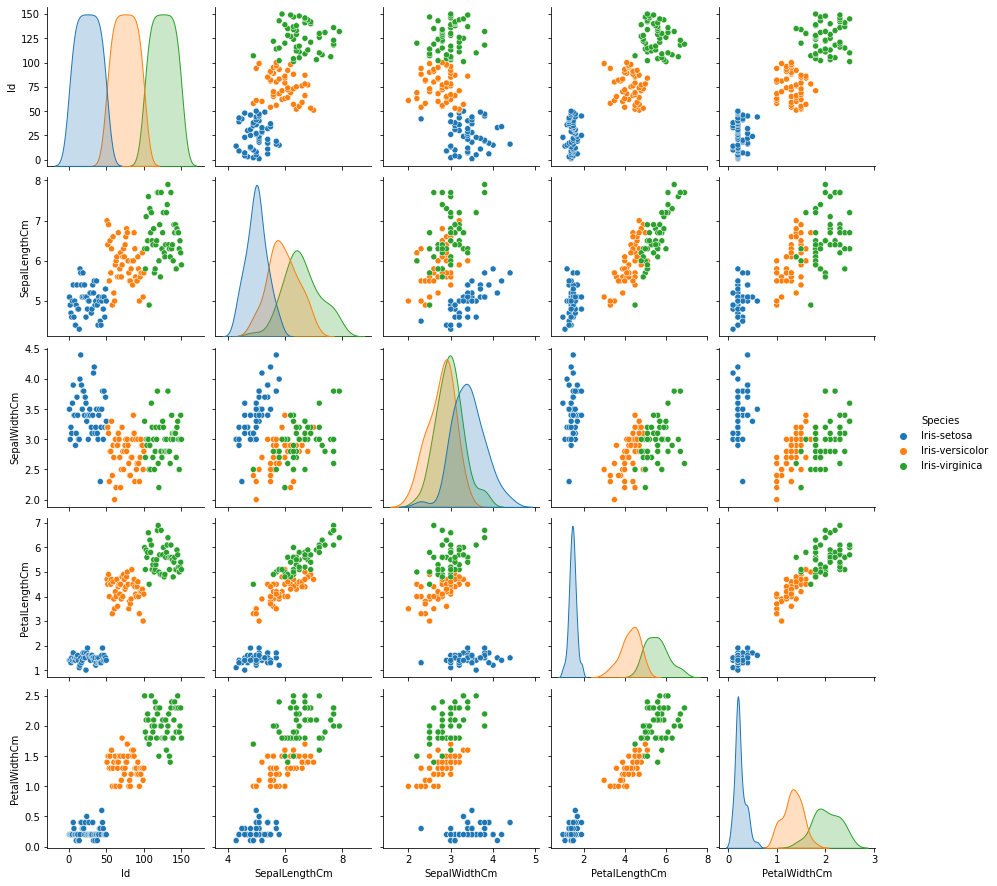

In [24]:
sns.pairplot(iris,hue='Species')
plt.show()

### Plotting Scatter plot of Speices 

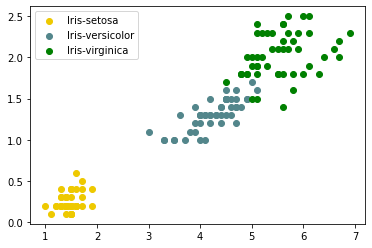

In [29]:
df1 = iris[iris['Species']=='Iris-setosa']
df2 = iris[iris['Species']=='Iris-versicolor']
df3 = iris[iris['Species']=='Iris-virginica']

plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'], color='#EEC900' , label='Iris-setosa')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'], color='#53868B', label='Iris-versicolor')
plt.scatter(df3['PetalLengthCm'],df3['PetalWidthCm'], color='g' , label='Iris-virginica ')


plt.legend()
plt.show()

### Decision Tree Model Training

#### Seperation of X and y Features

In [45]:
X=iris.iloc[:,0:4]
y=iris.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22)

#### Model Training

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
print("Training Complete.")
y_pred = tree_classifier.predict(X_test)

Training Complete.


#### Model Fitting

In [71]:
model_fit=DecisionTreeClassifier()
model_fit.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
df = DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
73,Iris-versicolor,Iris-versicolor
18,Iris-setosa,Iris-setosa
118,Iris-virginica,Iris-virginica
78,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
31,Iris-setosa,Iris-setosa
64,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
68,Iris-versicolor,Iris-versicolor
82,Iris-versicolor,Iris-versicolor


### creating decision tree classifier

In [63]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

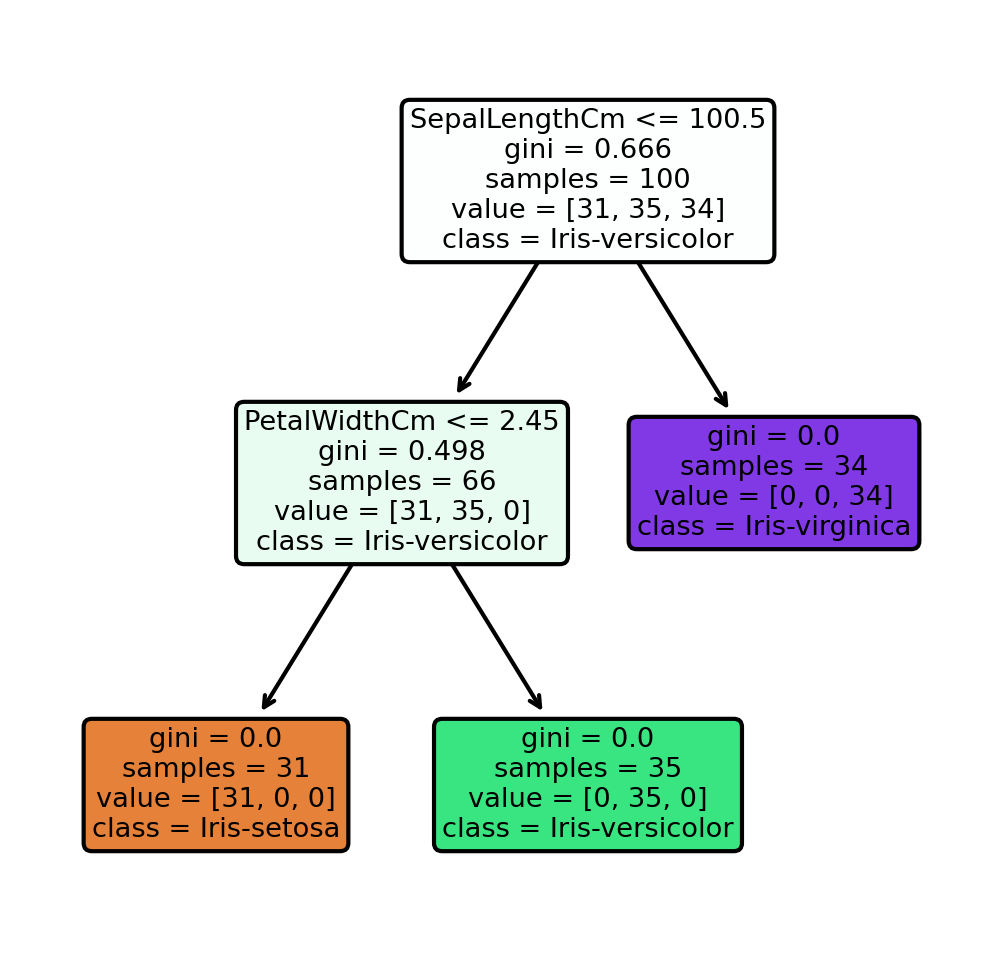

In [64]:
feature_name=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
class_name=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(classifier,
               feature_names = feature_name, 
               class_names=class_name,
               filled = True,
              rounded = True);
fig.savefig('dtree.png')

### Predict accuracy score :

In [69]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        16

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50



### Plotting Confusion matrix :

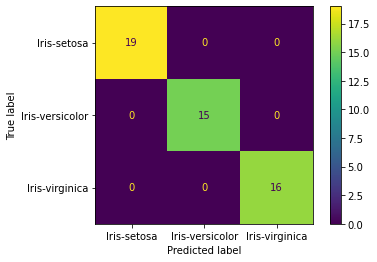

In [73]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_fit,X_test,y_test)
plt.show()

### Model Accuracy

In [76]:
print("Accuracy:",sm.accuracy_score(y_test, y_pred))

Accuracy: 1.0


#### Conclusion :
Thus, From this I may conclude i was able to successfully carry-out prediction using Prediction using Decision Tree Algorithm and was able to evaluate the model's accuracy score.

### Thank You 